In [4]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\Avishka\Desktop\AI for Liver Disease Outcome Prediction\train.csv")
print(df.shape)
print(df.head())


(15000, 20)
   id  N_Days             Drug      Age Sex Ascites Hepatomegaly Spiders  \
0   0   853.0  D-penicillamine  21828.0   F       N            Y       Y   
1   1   326.0          Placebo  19722.0   F       N            N       Y   
2   2  3297.0          Placebo  18713.0   F       N            Y       N   
3   3  1420.0          Placebo  19270.0   F       N            N       N   
4   4  2176.0  D-penicillamine  21247.0   F       N            N       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        5.4        374.0     3.26   105.0    1919.0  122.45   
1     N        0.6        260.0     3.01    49.0    7394.8  221.88   
2     N        0.7        280.0     3.90    52.0    9066.8   72.24   
3     N        0.7        281.0     3.61    32.0    1509.0   88.35   
4     N        0.6          NaN     3.75    20.0     666.0   54.25   

   Tryglicerides  Platelets  Prothrombin  Stage Status  
0          135.0      252.0         11.7    4.0      

In [5]:
print(df.columns)

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')


In [6]:
# Define features and target
X = df.drop(["Status", "id"], axis=1)  # drop 'Status' (target) and maybe 'id' (not useful for training)
y = df["Status"]

# Check class distribution
print(y.value_counts())


Status
C     10088
D      4537
CL      375
Name: count, dtype: int64


In [8]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.4 MB 14.3 MB/s eta 0:00:03
   --------- ------------------------------ 8.9/38.4 MB 29.4 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/38.4 MB 31.2 MB/s eta 0:00:01
   -------------------------- ------------- 25.4/38.4 MB 32.2 MB/s eta 0:00:01
   ---------------------------------- ----- 33.0/38.4 MB 32.9 MB/s eta 0:00:01
   ---------------------------------------  38.3/38.4 MB 33.6 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 28.3 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [11]:
df_encoded.fillna(df_encoded.median(numeric_only=True), inplace=True)


In [12]:
X = df_encoded.drop(['Status', 'id'], axis=1)
y = df_encoded['Status']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_valid)
print("Log Loss:", log_loss(y_valid, y_pred_proba))

y_pred = model.predict(X_valid)
print("Classification Report:")
print(classification_report(y_valid, y_pred))


Log Loss: 0.47924853310035953
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2018
           1       1.00      0.08      0.15        75
           2       0.82      0.73      0.77       907

    accuracy                           0.86      3000
   macro avg       0.90      0.58      0.61      3000
weighted avg       0.86      0.86      0.85      3000



In [16]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------------- -- 6.6/7.0 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 26.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


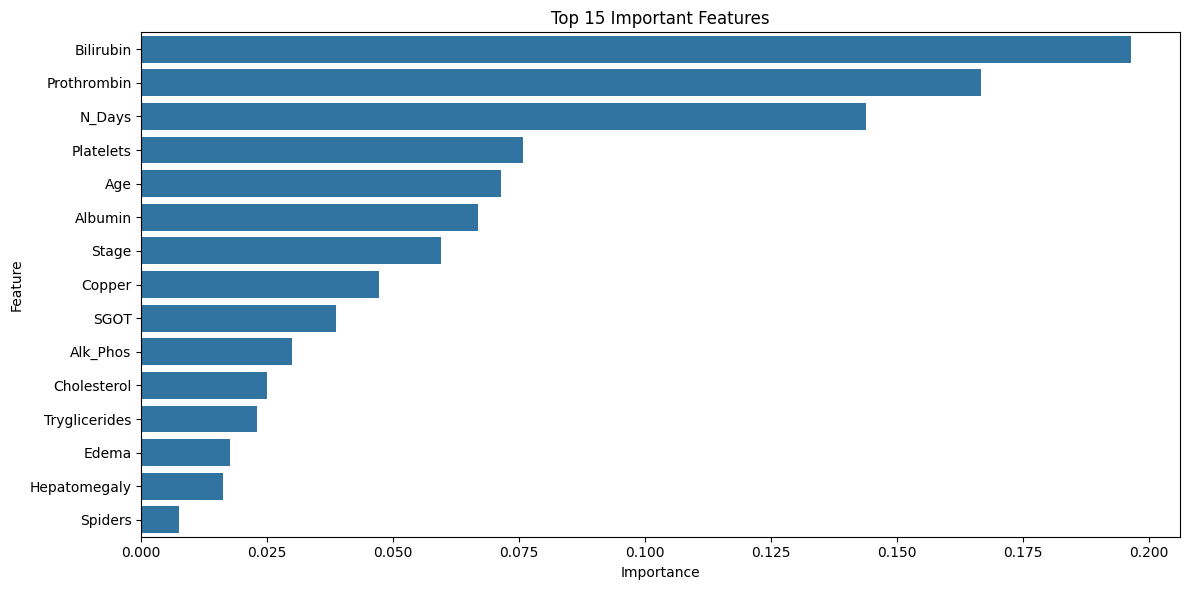

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()


In [18]:
selected_features = [
    'Bilirubin', 'Albumin', 'Prothrombin', 'Stage', 'Age', 'Drug',
    'Cholesterol', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Platelets'
]

X_selected = X[selected_features]


In [19]:
model = RandomForestClassifier()
model.fit(X_selected, y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# --------------------------------------
# 1. Select target and features
# --------------------------------------
X_full = df_encoded.drop(['Status', 'id'], axis=1)
y = df_encoded['Status']

# Reduced feature set (your selected top medical features)
selected_features = [
    'Bilirubin', 'Albumin', 'Prothrombin', 'Stage', 'Age', 'Drug',
    'Cholesterol', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Platelets'
]
X_reduced = df_encoded[selected_features]

# --------------------------------------
# 2. Train/test split (same for both)
# --------------------------------------
X_train_full, X_val_full, y_train, y_val = train_test_split(X_full, y, test_size=0.2, stratify=y, random_state=42)
X_train_reduced, X_val_reduced = X_reduced.loc[X_train_full.index], X_reduced.loc[X_val_full.index]

# --------------------------------------
# 3. Train full-feature model
# --------------------------------------
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train_full, y_train)
pred_full = model_full.predict(X_val_full)
pred_proba_full = model_full.predict_proba(X_val_full)

# --------------------------------------
# 4. Train reduced-feature model
# --------------------------------------
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, y_train)
pred_reduced = model_reduced.predict(X_val_reduced)
pred_proba_reduced = model_reduced.predict_proba(X_val_reduced)

# --------------------------------------
# 5. Evaluate both models
# --------------------------------------
print("===== FULL FEATURE MODEL =====")
print("Log Loss:", log_loss(y_val, pred_proba_full))
print(classification_report(y_val, pred_full))

print("\n===== REDUCED FEATURE MODEL =====")
print("Log Loss:", log_loss(y_val, pred_proba_reduced))
print(classification_report(y_val, pred_reduced))


===== FULL FEATURE MODEL =====
Log Loss: 0.4797788924086217
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2018
           1       1.00      0.04      0.08        75
           2       0.82      0.71      0.76       907

    accuracy                           0.85      3000
   macro avg       0.89      0.57      0.58      3000
weighted avg       0.85      0.85      0.84      3000


===== REDUCED FEATURE MODEL =====
Log Loss: 0.5621895663854198
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2018
           1       0.50      0.07      0.12        75
           2       0.80      0.70      0.75       907

    accuracy                           0.84      3000
   macro avg       0.72      0.57      0.59      3000
weighted avg       0.83      0.84      0.83      3000



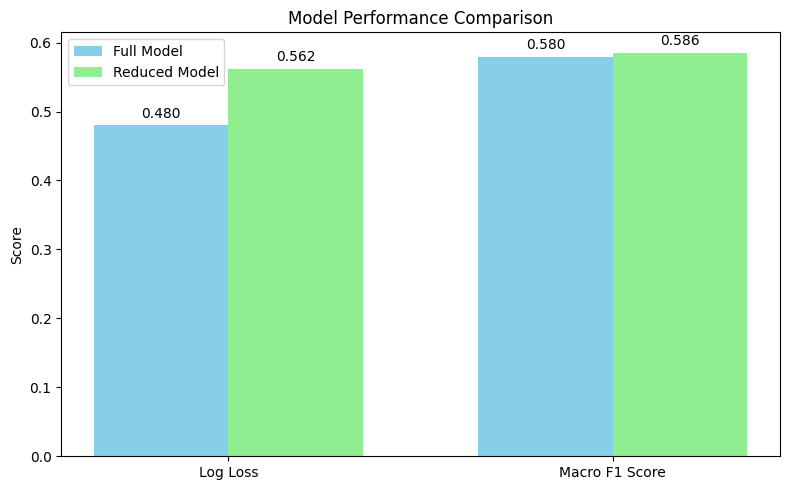

In [21]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
log_loss_full = log_loss(y_val, pred_proba_full)
log_loss_reduced = log_loss(y_val, pred_proba_reduced)

f1_full = f1_score(y_val, pred_full, average='macro')
f1_reduced = f1_score(y_val, pred_reduced, average='macro')

# Bar plot data
metrics = ['Log Loss', 'Macro F1 Score']
full_model_scores = [log_loss_full, f1_full]
reduced_model_scores = [log_loss_reduced, f1_reduced]

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, full_model_scores, width, label='Full Model', color='skyblue')
bars2 = ax.bar(x + width/2, reduced_model_scores, width, label='Reduced Model', color='lightgreen')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [22]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Top selected features:", list(selected_features))


Top selected features: ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin', 'Stage']


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume model is already trained on full feature set:
feature_importances = model_full.feature_importances_
features = X_full.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
N = 10
top_features = importance_df['Feature'].head(N).tolist()

print(f"Top {N} features by importance:")
print(top_features)

# Use only top features for training
X_train_top = X_train_full[top_features]
X_val_top = X_val_full[top_features]

# Retrain model
model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train)

# Evaluate
pred_top = model_top.predict(X_val_top)
pred_proba_top = model_top.predict_proba(X_val_top)

from sklearn.metrics import log_loss, classification_report
print("Log Loss (Top Features):", log_loss(y_val, pred_proba_top))
print(classification_report(y_val, pred_top))


Top 10 features by importance:
['Bilirubin', 'N_Days', 'Prothrombin', 'Platelets', 'Age', 'Albumin', 'Stage', 'Copper', 'SGOT', 'Alk_Phos']
Log Loss (Top Features): 0.4894486074187456
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2018
           1       0.57      0.05      0.10        75
           2       0.82      0.72      0.77       907

    accuracy                           0.85      3000
   macro avg       0.75      0.57      0.59      3000
weighted avg       0.84      0.85      0.84      3000



In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume model is already trained on full feature set:
feature_importances = model_full.feature_importances_
features = X_full.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Select top N features
N = 10
top_features = importance_df['Feature'].head(N).tolist()

print(f"Top {N} features by importance:")
print(top_features)

# Use only top features for training
X_train_top = X_train_full[top_features]
X_val_top = X_val_full[top_features]

# Retrain model
model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train)

# Evaluate
pred_top = model_top.predict(X_val_top)
pred_proba_top = model_top.predict_proba(X_val_top)

from sklearn.metrics import log_loss, classification_report
print("Log Loss (Top Features):", log_loss(y_val, pred_proba_top))
print(classification_report(y_val, pred_top))


Top 10 features by importance:
['Bilirubin', 'N_Days', 'Prothrombin', 'Platelets', 'Age', 'Albumin', 'Stage', 'Copper', 'SGOT', 'Alk_Phos']
Log Loss (Top Features): 0.4894486074187456
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2018
           1       0.57      0.05      0.10        75
           2       0.82      0.72      0.77       907

    accuracy                           0.85      3000
   macro avg       0.75      0.57      0.59      3000
weighted avg       0.84      0.85      0.84      3000



In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

N = 10
estimator = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=estimator, n_features_to_select=N)
rfe.fit(X_train_full, y_train)

top_features_rfe = X_train_full.columns[rfe.support_].tolist()
print(f"Top {N} features selected by RFE:")
print(top_features_rfe)

# Train model with selected features
X_train_rfe = X_train_full[top_features_rfe]
X_val_rfe = X_val_full[top_features_rfe]

model_rfe = RandomForestClassifier(random_state=42)
model_rfe.fit(X_train_rfe, y_train)

pred_rfe = model_rfe.predict(X_val_rfe)
pred_proba_rfe = model_rfe.predict_proba(X_val_rfe)

print("Log Loss (RFE):", log_loss(y_val, pred_proba_rfe))
print(classification_report(y_val, pred_rfe))


Top 10 features selected by RFE:
['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin', 'Stage']
Log Loss (RFE): 0.5191320750866667
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2018
           1       0.80      0.05      0.10        75
           2       0.82      0.72      0.76       907

    accuracy                           0.85      3000
   macro avg       0.83      0.57      0.59      3000
weighted avg       0.85      0.85      0.84      3000



In [26]:
# Assuming you already have a trained model_full and your full feature set X_full

import pandas as pd

# Get feature importances and feature names
feature_importances = model_full.feature_importances_
features = X_full.columns

# Create a DataFrame for easy sorting and visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Choose top N features
N = 10
top_features = importance_df['Feature'].head(N).tolist()

print(f"Top {N} features by importance:")
print(top_features)

# Use these features for model retraining or further analysis
X_top = X_full[top_features]


Top 10 features by importance:
['Bilirubin', 'N_Days', 'Prothrombin', 'Platelets', 'Age', 'Albumin', 'Stage', 'Copper', 'SGOT', 'Alk_Phos']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# Assuming 'top_features' is your list of top N features from feature importance
X_top = X_full[top_features]

# Split data into train and validation sets
X_train_top, X_val_top, y_train, y_val = train_test_split(
    X_top, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize and train the model
model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train)

# Predict probabilities and classes on validation set
y_pred_proba_top = model_top.predict_proba(X_val_top)
y_pred_top = model_top.predict(X_val_top)

# Evaluate with log loss and classification report
print("Log Loss (Top Features):", log_loss(y_val, y_pred_proba_top))
print("Classification Report (Top Features):")
print(classification_report(y_val, y_pred_top))


Log Loss (Top Features): 0.4894486074187456
Classification Report (Top Features):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2018
           1       0.57      0.05      0.10        75
           2       0.82      0.72      0.77       907

    accuracy                           0.85      3000
   macro avg       0.75      0.57      0.59      3000
weighted avg       0.84      0.85      0.84      3000



Accuracy: 0.8527
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2018
           1       0.57      0.05      0.10        75
           2       0.82      0.72      0.77       907

    accuracy                           0.85      3000
   macro avg       0.75      0.57      0.59      3000
weighted avg       0.84      0.85      0.84      3000

Log Loss: 0.4894


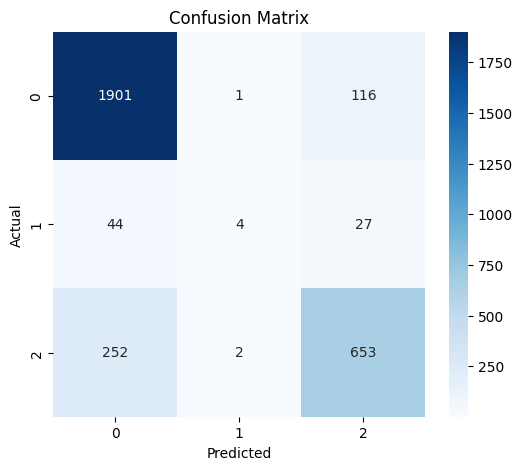

In [28]:
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_val = true labels (validation)
# y_pred_top = predicted classes from model
# y_pred_proba_top = predicted probabilities from model

# Accuracy
acc = accuracy_score(y_val, y_pred_top)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_pred_top))

# Log Loss (lower is better)
ll = log_loss(y_val, y_pred_proba_top)
print(f"Log Loss: {ll:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_val, y_pred_top)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_top.classes_,
            yticklabels=model_top.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
# Full model predictions
y_pred_full = model_full.predict(X_val_full)
y_pred_proba_full = model_full.predict_proba(X_val_full)

# Top features model predictions
y_pred_top = model_top.predict(X_val_top)
y_pred_proba_top = model_top.predict_proba(X_val_top)


In [30]:
from sklearn.metrics import classification_report, log_loss, f1_score, accuracy_score

metrics = {}

# Full model metrics
metrics['Full'] = {
    'Log Loss': log_loss(y_val, y_pred_proba_full),
    'Accuracy': accuracy_score(y_val, y_pred_full),
    'Macro F1': f1_score(y_val, y_pred_full, average='macro')
}

# Top N features model metrics
metrics['Top'] = {
    'Log Loss': log_loss(y_val, y_pred_proba_top),
    'Accuracy': accuracy_score(y_val, y_pred_top),
    'Macro F1': f1_score(y_val, y_pred_top, average='macro')
}

for model_name, vals in metrics.items():
    print(f"=== {model_name} Model ===")
    for metric_name, value in vals.items():
        print(f"{metric_name}: {value:.4f}")
    print()


=== Full Model ===
Log Loss: 0.4798
Accuracy: 0.8507
Macro F1: 0.5797

=== Top Model ===
Log Loss: 0.4894
Accuracy: 0.8527
Macro F1: 0.5888



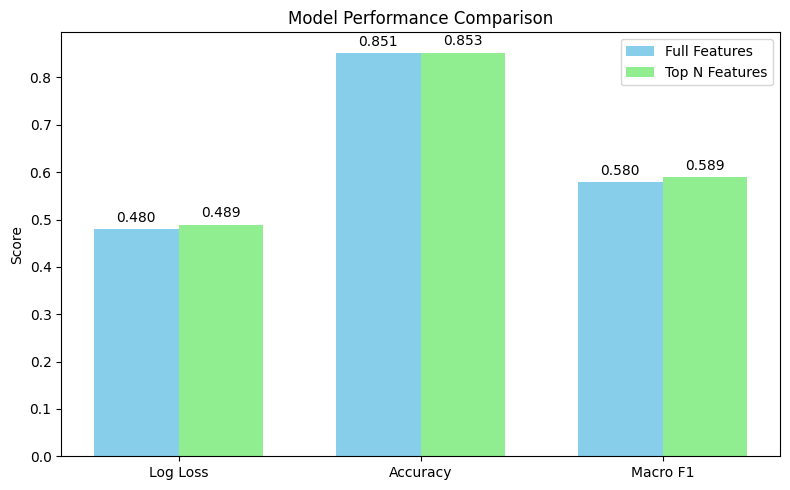

In [31]:
import matplotlib.pyplot as plt
import numpy as np

metric_names = ['Log Loss', 'Accuracy', 'Macro F1']
full_scores = [metrics['Full'][m] for m in metric_names]
top_scores = [metrics['Top'][m] for m in metric_names]

x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, full_scores, width, label='Full Features', color='skyblue')
bars2 = ax.bar(x + width/2, top_scores, width, label='Top N Features', color='lightgreen')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [33]:
df['Prothrombin_Platelets_Ratio'] = df['Prothrombin_Platelets_Ratio'].fillna(0)


In [34]:
import numpy as np

# Interaction feature 1
df['Bili_Alb'] = df['Bilirubin'] * df['Albumin']

# Interaction feature 2
df['Age_Stage'] = df['Age'] * df['Stage']

# Interaction feature 3 with safe division and fill missing values
df['Prothrombin_Platelets_Ratio'] = df['Prothrombin'] / df['Platelets'].replace(0, np.nan)
df['Prothrombin_Platelets_Ratio'] = df['Prothrombin_Platelets_Ratio'].fillna(0)

print(df[['Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio']].head())


   Bili_Alb  Age_Stage  Prothrombin_Platelets_Ratio
0    17.604    87312.0                     0.046429
1     1.806    78888.0                     0.041509
2     2.730    74852.0                     0.018828
3     2.527    57810.0                     0.036122
4     2.250    21247.0                     0.024270


In [35]:
binary_cols = ['Ascites', 'Edema', 'Spiders']

for col in binary_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0})


In [36]:
df['Drug'] = df['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})


In [37]:
# Example, if Edema had 3 levels
severity_map = {'None': 0, 'Mild': 1, 'Severe': 2}
df['Edema'] = df['Edema'].map(severity_map)


In [39]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X = df.drop(columns=['Status'])
y = df['Status']

# Split into train and validation (e.g., 80% train, 20% valid)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Reconstruct train and valid DataFrames to hold all columns for encoding
df_train = X_train.copy()
df_train['Status'] = y_train

df_valid = X_valid.copy()
df_valid['Status'] = y_valid


In [40]:
status_map = {'C': 0, 'D': 1, 'CL': 2}
df_train['Status_num'] = df_train['Status'].map(status_map)

mean_target_per_drug = df_train.groupby('Drug')['Status_num'].mean()

df_train['Drug_encoded'] = df_train['Drug'].map(mean_target_per_drug)
df_valid['Drug_encoded'] = df_valid['Drug'].map(mean_target_per_drug)

overall_mean = df_train['Status_num'].mean()
df_valid['Drug_encoded'] = df_valid['Drug_encoded'].fillna(overall_mean)

df_train.drop(columns=['Status_num'], inplace=True)


In [41]:
import pandas as pd

# Define age bins and labels
age_bins = [0, 30, 50, 70, 100]
age_labels = [1, 2, 3, 4]

df['Age_bin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [42]:
# Example: group stages 3 & 4 as "advanced"
df['Stage_grouped'] = df['Stage'].apply(lambda x: 'early' if x <= 2 else 'advanced')


In [43]:
bilirubin_bins = [0, 1.2, 3, df['Bilirubin'].max()]
bilirubin_labels = ['Low', 'Medium', 'High']

df['Bilirubin_bin'] = pd.cut(df['Bilirubin'], bins=bilirubin_bins, labels=bilirubin_labels, right=False)


In [44]:
import numpy as np

skewed_features = ['Bilirubin', 'Cholesterol', 'SGOT']

for col in skewed_features:
    # Convert to numeric, coerce errors to NaN if needed
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Apply log1p transform
    df[col + '_log'] = np.log1p(df[col])


In [45]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale (including log-transformed)
numeric_cols = ['Bilirubin_log', 'Cholesterol_log', 'SGOT_log', 'Age', 'Prothrombin', 'Platelets', 'Albumin', 'Stage']

scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [46]:
import numpy as np

skewed_features = ['Bilirubin', 'Cholesterol', 'SGOT']

# Convert columns to numeric if needed and apply log1p transform
for col in skewed_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_log'] = np.log1p(df[col])


In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status'])
y = df['Status']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to scale (use log-transformed versions)
features_to_scale = ['Bilirubin_log', 'Cholesterol_log', 'SGOT_log', 'Age', 'Prothrombin', 'Platelets', 'Albumin', 'Stage']

# Initialize scaler
scaler = StandardScaler()  # or MinMaxScaler()

# Fit scaler on training data only
scaler.fit(X_train[features_to_scale])

# Transform train and validation sets
X_train_scaled = X_train.copy()
X_valid_scaled = X_valid.copy()

X_train_scaled[features_to_scale] = scaler.transform(X_train[features_to_scale])
X_valid_scaled[features_to_scale] = scaler.transform(X_valid[features_to_scale])


In [49]:
import numpy as np

# Ensure N_Days is numeric
df['N_Days'] = pd.to_numeric(df['N_Days'], errors='coerce')

# Log transform
df['Log_N_Days'] = np.log1p(df['N_Days'])


In [50]:
threshold = 1000
df['Long_followup'] = (df['N_Days'] > threshold).astype(int)


In [51]:
print(df[['N_Days', 'Log_N_Days', 'Long_followup']].head())


   N_Days  Log_N_Days  Long_followup
0   853.0    6.749931              0
1   326.0    5.789960              0
2  3297.0    8.101072              1
3  1420.0    7.259116              1
4  2176.0    7.685703              1


In [52]:
import numpy as np

# MELD Score (approximate, assuming 'Prothrombin' ~ PT, no creatinine available)
# Replace zero or negative values before log
df['Bilirubin_adj'] = df['Bilirubin'].clip(lower=0.1)
df['Prothrombin_adj'] = df['Prothrombin'].clip(lower=0.1)  # proxy for INR, approximate

df['MELD'] = (3.78 * np.log(df['Bilirubin_adj']) +
              11.2 * np.log(df['Prothrombin_adj']) +
              6.43)

# Child-Pugh Score components

def bilirubin_score(x):
    if x < 2:
        return 1
    elif 2 <= x <= 3:
        return 2
    else:
        return 3

def albumin_score(x):
    if x > 3.5:
        return 1
    elif 2.8 <= x <= 3.5:
        return 2
    else:
        return 3

def prothrombin_score(x):
    if x < 1.7:
        return 1
    elif 1.7 <= x <= 2.3:
        return 2
    else:
        return 3

def ascites_score(x):
    # Assuming Ascites binary 0/1 or Y/N
    if x == 0 or x == 'N':
        return 1
    elif x == 1 or x == 'Y':
        return 3  # simplify moderate/severe combined
    else:
        return 2  # fallback

df['Bilirubin_score'] = df['Bilirubin'].apply(bilirubin_score)
df['Albumin_score'] = df['Albumin'].apply(albumin_score)
df['Prothrombin_score'] = df['Prothrombin'].apply(prothrombin_score)
df['Ascites_score'] = df['Ascites'].map({'N':1, 'Y':3})

df['Child_Pugh_score'] = df[['Bilirubin_score', 'Albumin_score', 'Prothrombin_score', 'Ascites_score']].sum(axis=1)


In [53]:
# List columns with missing data
cols_with_missing = ['Cholesterol', 'Tryglicerides']  # add more as needed

for col in cols_with_missing:
    df[col + '_missing'] = df[col].isnull().astype(int)


In [54]:
# Map 'Y' to 1 and 'N' to 0
symptom_cols = ['Ascites', 'Edema', 'Spiders']

for col in symptom_cols:
    df[col + '_bin'] = df[col].map({'Y': 1, 'N': 0})

# Sum binary symptom columns to create symptom score
df['Symptom_Score'] = df[[col + '_bin' for col in symptom_cols]].sum(axis=1)


In [55]:
import numpy as np

df['Bili_Alb'] = df['Bilirubin'] * df['Albumin']
df['Age_Stage'] = df['Age'] * df['Stage']

df['Age_bin'] = pd.cut(df['Age'], bins=[0,30,50,70,120], labels=[1,2,3,4])

df['Log_N_Days'] = np.log1p(df['N_Days'])


In [56]:
numeric_features = ['Age', 'Bilirubin_log', 'Albumin', 'Prothrombin', 'Platelets', 'Stage']

for col in numeric_features:
    df[col + '_sq'] = df[col] ** 2


In [57]:
df['Bili_Alb_interaction'] = df['Bilirubin_log'] * df['Albumin']


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

numeric_features = ['Age', 'Bilirubin_log', 'Albumin', 'Prothrombin', 'Platelets', 'Stage']

# Select numeric data
numeric_data = df[numeric_features]

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(numeric_data_imputed)

# Get feature names
poly_feature_names = poly.get_feature_names_out(numeric_features)

# Create a DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate with original df (resetting index to align)
df = pd.concat([df.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)


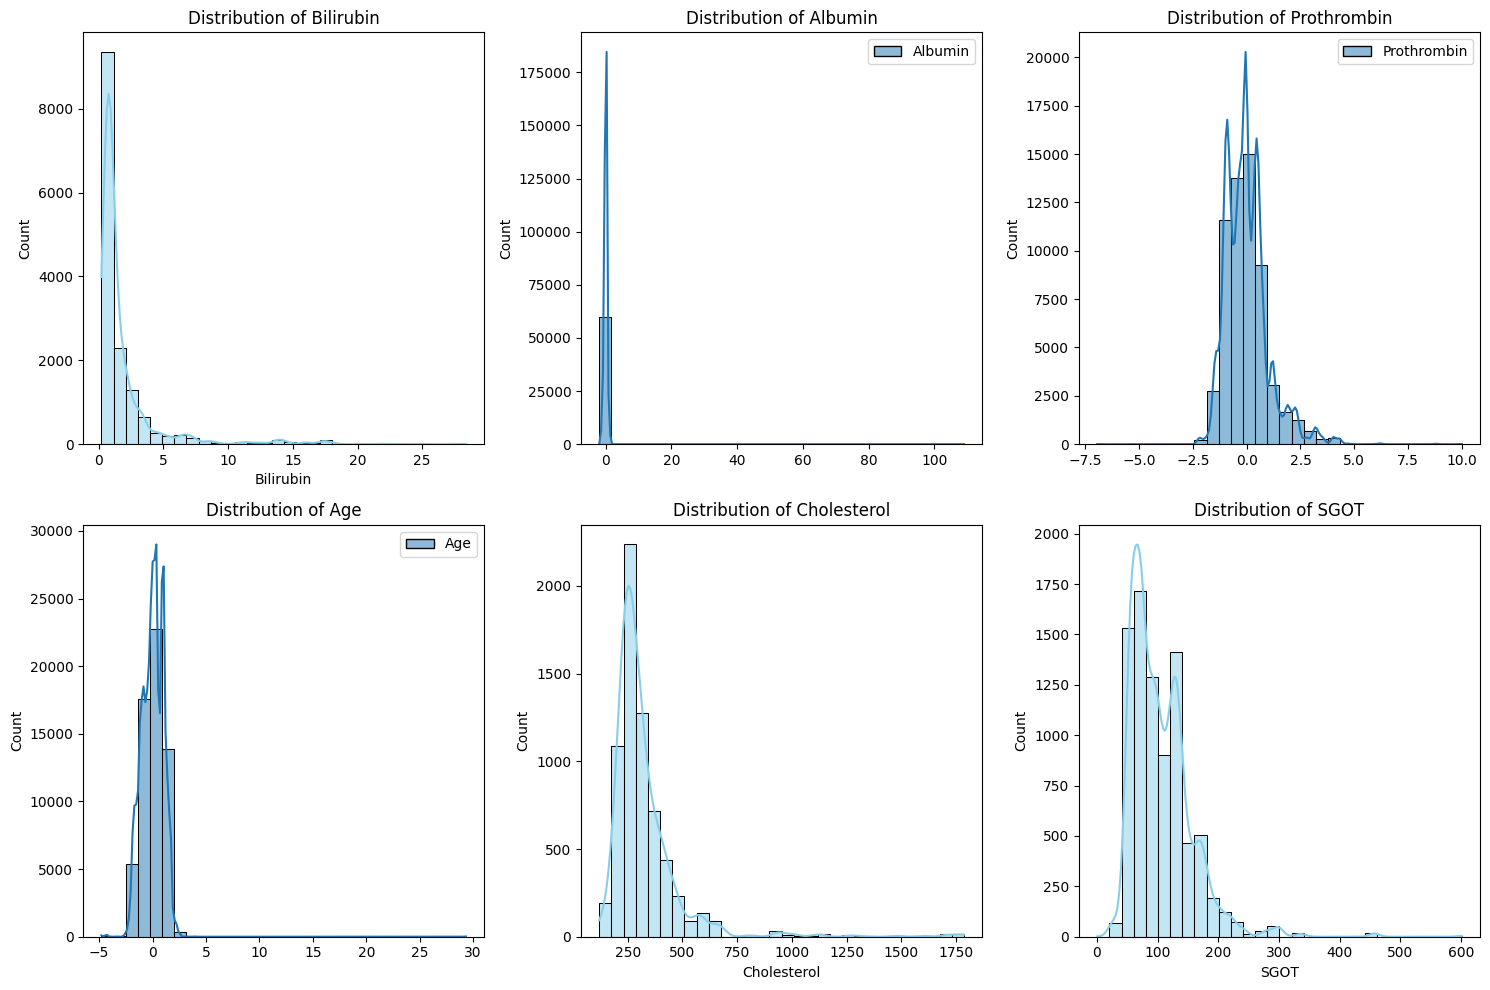

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Bilirubin', 'Albumin', 'Prothrombin', 'Age', 'Cholesterol', 'SGOT']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [64]:
type(df)


pandas.core.frame.DataFrame

In [65]:
print(df.columns)
print(df[categorical_features].head())


Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Bili_Alb', 'Age_Stage',
       'Prothrombin_Platelets_Ratio', 'Age_bin', 'Stage_grouped',
       'Bilirubin_bin', 'Bilirubin_log', 'Cholesterol_log', 'SGOT_log',
       'Log_N_Days', 'Long_followup', 'Bilirubin_adj', 'Prothrombin_adj',
       'MELD', 'Bilirubin_score', 'Albumin_score', 'Prothrombin_score',
       'Ascites_score', 'Child_Pugh_score', 'Cholesterol_missing',
       'Tryglicerides_missing', 'Ascites_bin', 'Edema_bin', 'Spiders_bin',
       'Symptom_Score', 'Age_sq', 'Bilirubin_log_sq', 'Albumin_sq',
       'Prothrombin_sq', 'Platelets_sq', 'Stage_sq', 'Bili_Alb_interaction',
       'Age', 'Bilirubin_log', 'Albumin', 'Prothrombin', 'Platelets', 'Stage',
       'Age Bilirubin_log', 'Age Albumin', 'Age Prothrombin', 'Age Platelets',


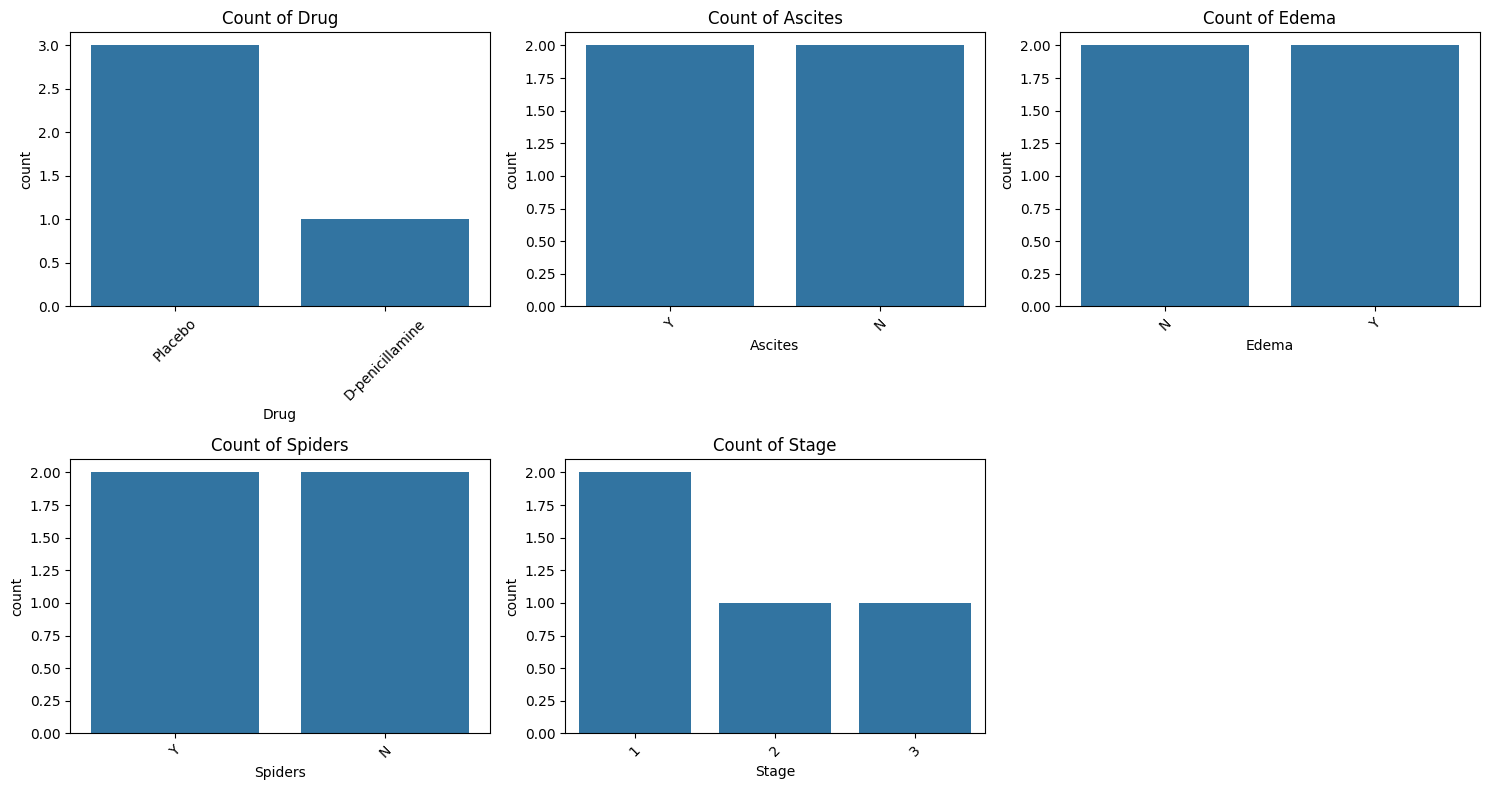

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example small DataFrame
data = {
    'Drug': ['Placebo', 'D-penicillamine', 'Placebo', 'Placebo'],
    'Ascites': ['Y', 'N', 'N', 'Y'],
    'Edema': ['N', 'N', 'Y', 'Y'],
    'Spiders': ['Y', 'N', 'Y', 'N'],
    'Stage': ['1', '2', '1', '3']
}
df_test = pd.DataFrame(data)

categorical_features = ['Drug', 'Ascites', 'Edema', 'Spiders', 'Stage']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_test, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


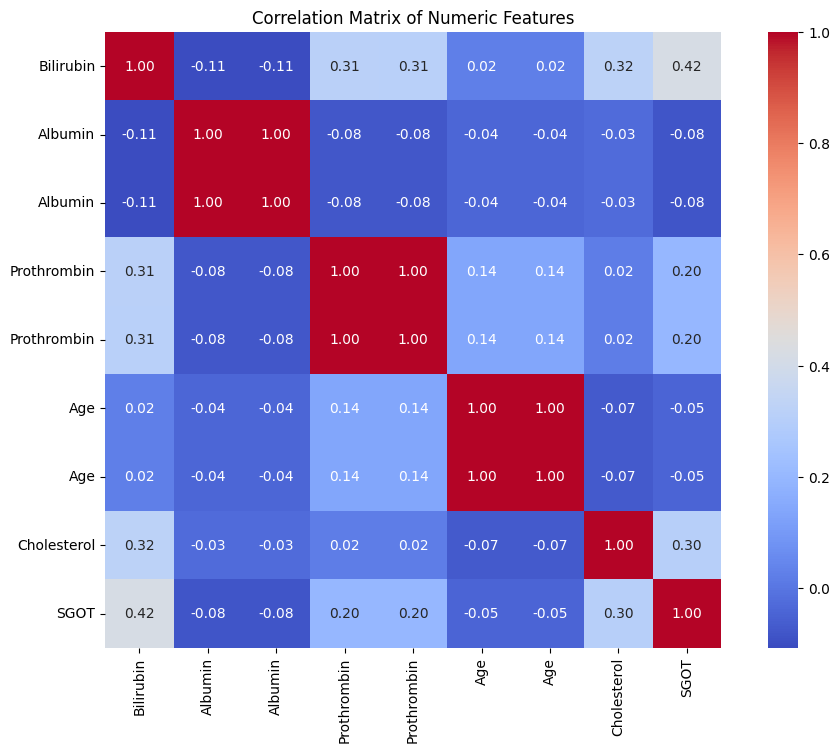

In [67]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [69]:
print(df[numeric_features].dtypes)
print(df[numeric_features].head())


Bilirubin      float64
Albumin        float64
Albumin        float64
Prothrombin    float64
Prothrombin    float64
Age            float64
Age            float64
Cholesterol    float64
SGOT           float64
dtype: object
   Bilirubin   Albumin   Albumin  Prothrombin  Prothrombin       Age  \
0        5.4 -0.340708 -0.340708     1.456552     1.456552  0.678110   
1        0.6 -0.648618 -0.648618     0.507877     0.507877  0.118856   
2        0.7  0.447540  0.447540    -0.034223    -0.034223 -0.149086   
3        0.7  0.090365  0.090365    -1.524998    -1.524998 -0.001174   
4        0.6  0.262795  0.262795     0.236827     0.236827  0.523824   

        Age  Cholesterol    SGOT  
0  0.678110        374.0  122.45  
1  0.118856        260.0  221.88  
2 -0.149086        280.0   72.24  
3 -0.001174        281.0   88.35  
4  0.523824          NaN   54.25  


In [71]:
df_numeric = df[numeric_features].copy()

# Drop duplicate columns keeping the first occurrence
df_numeric = df_numeric.loc[:,~df_numeric.columns.duplicated()]


In [72]:
df_numeric = df_numeric.dropna()


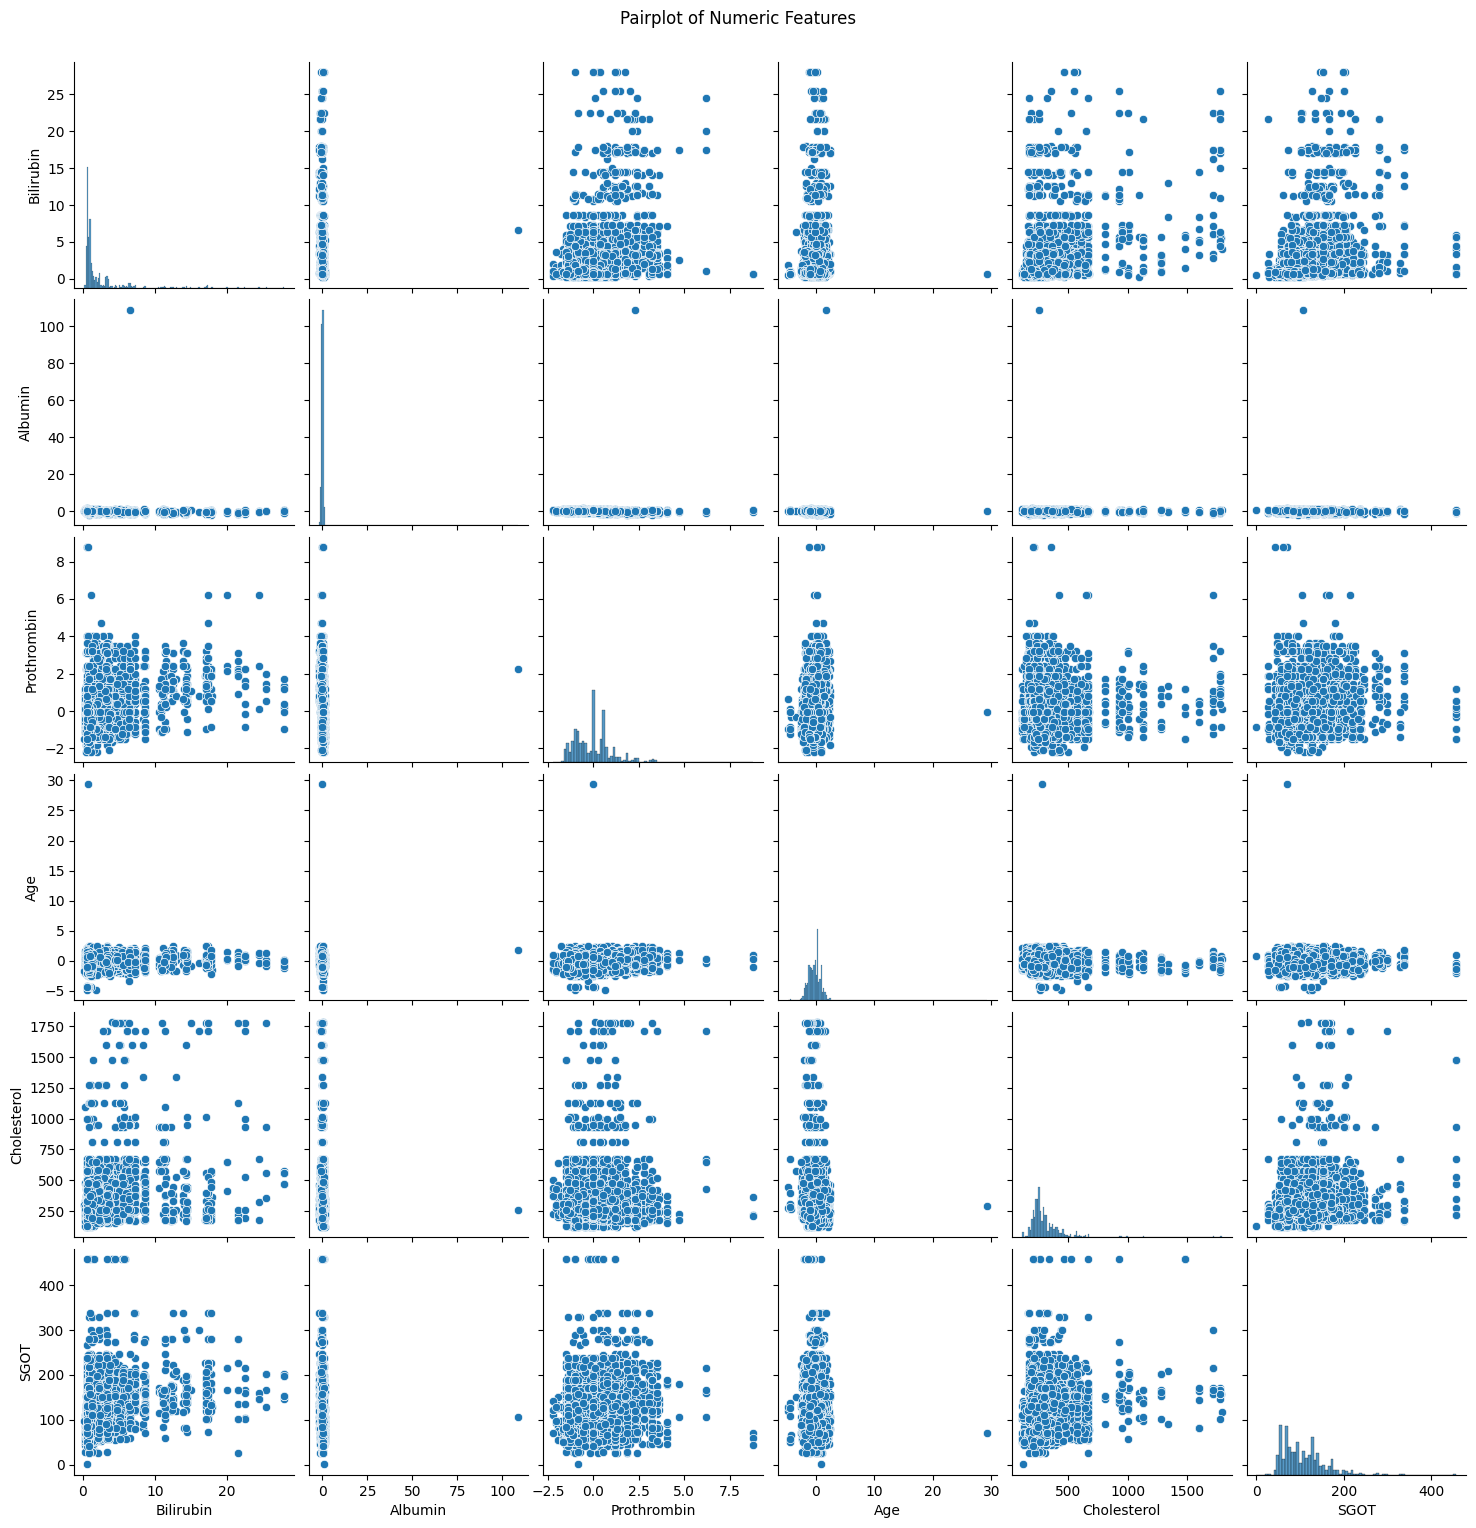

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_numeric)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Define custom feature engineering function
def create_features(X):
    X = X.copy()
    X['Bili_Alb'] = X['Bilirubin'] * X['Albumin']
    X['Age_Stage'] = X['Age'] * X['Stage']
    X['Prothrombin_Platelets_Ratio'] = X['Prothrombin'] / X['Platelets']
    return X

# Wrap into a transformer
feature_creator = FunctionTransformer(create_features)

# Example usage:
pipeline = Pipeline([
    ('feature_creation', feature_creator),
    ('model', RandomForestClassifier())
])


In [76]:
!pip install featuretools


   ---------------------------------------- 0.0/587.9 kB ? eta -:--:--
   ---------------------------------------- 587.9/587.9 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 14.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
!pip install setuptools



   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 8.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
df.columns[df.columns.duplicated()]


Index(['Age', 'Bilirubin_log', 'Albumin', 'Prothrombin', 'Platelets', 'Stage'], dtype='object')

In [83]:
print(df.columns[df.columns.duplicated()])  # Should return empty Index([])


Index([], dtype='object')


In [84]:
import featuretools as ft

es = ft.EntitySet(id='liver')
es = es.add_dataframe(dataframe_name='patients', dataframe=df, index='id')


c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\w

In [85]:
import featuretools as ft

# Define entity set
es = ft.EntitySet(id='liver')

# Add your data
es = es.add_dataframe(dataframe_name='patients', dataframe=df, index='id')

# Automatically generate features
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='patients',
                                      max_depth=2, verbose=True)


c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


Built 61 features
Elapsed: 00:00 | Progress: 100%|██████████


In [113]:
# Separate categorical and numeric columns
cat_cols = feature_matrix.select_dtypes(include=['category', 'object']).columns
num_cols = feature_matrix.select_dtypes(include=['number']).columns

# For categorical columns, fill NaN with a new category like 'Missing'
for col in cat_cols:
    if feature_matrix[col].dtype.name == 'category':
        # Add 'Missing' as a category if it doesn't exist
        if 'Missing' not in feature_matrix[col].cat.categories:
            feature_matrix[col] = feature_matrix[col].cat.add_categories('Missing')
        feature_matrix[col] = feature_matrix[col].fillna('Missing')
    else:
        # For object columns, just fill with 'Missing'
        feature_matrix[col] = feature_matrix[col].fillna('Missing')

# For numeric columns, fill NaN with 0 or median
feature_matrix[num_cols] = feature_matrix[num_cols].fillna(0)

# Check again
print(feature_matrix.isnull().sum())


N_Days                   0
Drug                     0
Age                      0
Sex                      0
Ascites                  0
                        ..
Albumin Platelets        0
Albumin Stage            0
Prothrombin Platelets    0
Prothrombin Stage        0
Platelets Stage          0
Length: 61, dtype: int64


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.2, random_state=42)


In [115]:
print(feature_matrix.dtypes.value_counts())


float64     45
int64        6
Int64        4
boolean      1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [116]:
categorical_cols = feature_matrix.select_dtypes(include=['category', 'object']).columns

# One-hot encode them (drop_first=True to avoid multicollinearity)
feature_matrix_encoded = pd.get_dummies(feature_matrix, columns=categorical_cols, drop_first=True)


In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_matrix_encoded)


In [119]:
print(X_train.select_dtypes(include=['object', 'category']).columns.tolist())


['Sex', 'Status', 'Age_bin', 'Stage_grouped', 'Bilirubin_bin']


In [120]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align test set columns with train set (in case test set is missing some dummies)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [121]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


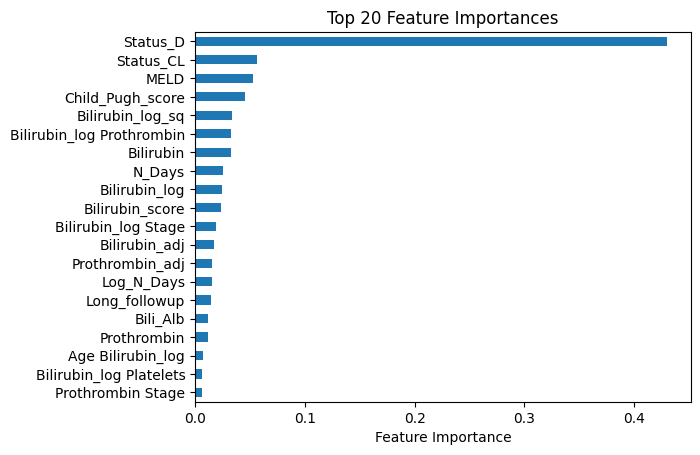

In [123]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on encoded data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_encoded, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feat_imp = pd.Series(importances, index=X_train_encoded.columns).sort_values(ascending=False)

# Plot top 20 features
feat_imp.head(20).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [125]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # or 'mean', 'most_frequent', etc.

# Fit imputer on training data and transform train and test
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_encoded), columns=X_test_encoded.columns)


In [126]:
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train_imputed, y_train)


c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Avishka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https

In [127]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(X_train_encoded, y_train)  # works even if NaNs exist


,loss,'log_loss'
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'
,monotonic_cst,None


In [128]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_encoded), columns=X_test_encoded.columns)


In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test_imputed.columns)


In [130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

# Reduce train and test sets to selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]


Selected features: ['Age', 'Stage', 'Bilirubin_log', 'Long_followup', 'MELD', 'Child_Pugh_score', 'Bilirubin_log Prothrombin', 'Status_CL', 'Status_D', 'Bilirubin_bin_Medium']


In [132]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming y_test has classes [0,1,2,...] — adjust if different
classes = sorted(y_test.unique())  
y_test_binarized = label_binarize(y_test, classes=classes)

# y_proba should have shape (n_samples, n_classes)
roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')

print("ROC AUC (OVR):", roc_auc)


ROC AUC (OVR): 1.0


In [134]:
non_numeric_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['Age_bin', 'Bilirubin_bin']


In [135]:
from sklearn.preprocessing import OneHotEncoder

X_encoded = pd.get_dummies(X_encoded, drop_first=True)


In [136]:
print(X_encoded.dtypes)


id                               int64
N_Days                         float64
Drug                           float64
Age                            float64
Sex                              int64
Ascites                        float64
Hepatomegaly                     int64
Spiders                        float64
Edema                          float64
Bilirubin                      float64
Cholesterol                    float64
Albumin                        float64
Copper                         float64
Alk_Phos                       float64
SGOT                           float64
Tryglicerides                  float64
Platelets                      float64
Prothrombin                    float64
Stage                          float64
Bili_Alb                       float64
Age_Stage                      float64
Prothrombin_Platelets_Ratio    float64
Stage_grouped                    int64
Bilirubin_log                  float64
Cholesterol_log                float64
SGOT_log                 

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation accuracies: [0.76666667 0.85666667 0.84333333 0.84533333 0.65966667]
Mean CV accuracy: 0.7943333333333333
Standard deviation: 0.0745493125387485


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 🧼 Encode all categorical columns in X using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# ✅ Split your encoded dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# ✅ Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# ✅ Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score (OVR):", roc_auc_score(y_test, y_proba, multi_class='ovr'))


Classification Report:
               precision    recall  f1-score   support

           C       0.86      0.94      0.90      1971
          CL       1.00      0.04      0.08        75
           D       0.82      0.72      0.77       954

    accuracy                           0.85      3000
   macro avg       0.89      0.57      0.58      3000
weighted avg       0.85      0.85      0.83      3000

ROC AUC Score (OVR): 0.8936764564589509


In [141]:
non_numeric = X.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", non_numeric.tolist())


Categorical columns: ['Bilirubin_bin']


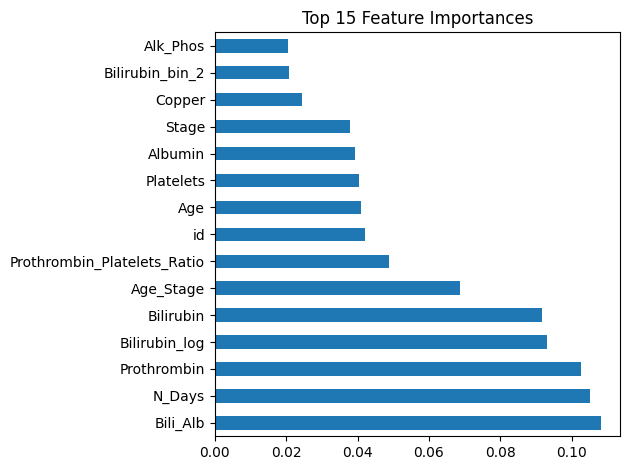

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
feature_importances.nlargest(15).plot(kind='barh', title='Top 15 Feature Importances')
plt.tight_layout()
plt.show()


In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_encoded, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Accuracy: 0.8481333333333334


In [144]:
import joblib

joblib.dump(model, 'final_model.pkl')
# Later, load it with:
# model = joblib.load('final_model.pkl')


['final_model.pkl']

In [145]:
import pickle

# After training your model
pickle.dump(model, open("model.pkl", "wb"))


In [146]:
import os
print(os.getcwd())


c:\Users\Avishka\Desktop\AI for Liver Disease Outcome Prediction


In [147]:
print(X.columns.tolist())


['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio', 'Age_bin', 'Stage_grouped', 'Bilirubin_bin', 'Bilirubin_log', 'Cholesterol_log', 'SGOT_log']


In [151]:
import streamlit as st



In [152]:
import streamlit as st
import pickle

# Load trained model
model = pickle.load(open("model.pkl", "rb"))

st.title("Liver Disease Outcome Prediction")

id = st.number_input("Patient ID", min_value=0, value=1)
N_Days = st.number_input("N_Days", min_value=0, value=100)
Drug = st.selectbox("Drug", ["D-penicillamine", "Placebo"])
# continue with the rest of the inputs...


2025-07-10 12:16:20.850 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.234 
  command:

    streamlit run C:\Users\Avishka\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-10 12:16:21.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:16:21.248 Th

In [155]:
print(X_train.columns)  # during training


Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
       'Age_bin', 'Stage_grouped', 'Bilirubin_log', 'Cholesterol_log',
       'SGOT_log', 'Bilirubin_bin_1', 'Bilirubin_bin_2'],
      dtype='object')


In [158]:
from sklearn.preprocessing import LabelEncoder

# Example of label encoding 'Drug'
le_drug = LabelEncoder()
le_drug.fit(['D-penicillamine', 'Placebo'])  # Use all categories from training

encoded_drug = le_drug.transform(['D-penicillamine'])  # returns [0] or [1]


In [159]:
import streamlit as st
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize and fit LabelEncoders once
le_drug = LabelEncoder()
le_drug.fit(['D-penicillamine', 'Placebo'])

# Streamlit input
user_drug = st.selectbox("Select Drug", ['D-penicillamine', 'Placebo'])

# Encode user input
encoded_drug = le_drug.transform([user_drug])[0]

# Use encoded_drug as part of your input data to the model
st.write(f"Encoded drug value: {encoded_drug}")

# Then construct the full input DataFrame with all features (encoded and numeric)
# and call model.predict()


2025-07-10 12:23:11.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.598 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 12:23:11.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assume you have these encoders saved or define them here for demo
le_drug = LabelEncoder()
le_drug.fit(['D-penicillamine', 'Placebo'])

le_sex = LabelEncoder()
le_sex.fit(['Male', 'Female'])

le_age_bin = LabelEncoder()
le_age_bin.fit(['<35', '35-50', '>50'])

le_stage_grouped = LabelEncoder()
le_stage_grouped.fit(['low', 'mid', 'high'])

def preprocess_input(raw_input):
    # Encode categorical variables
    raw_input['Drug'] = le_drug.transform([raw_input['Drug']])[0]
    raw_input['Sex'] = le_sex.transform([raw_input['Sex']])[0]
    raw_input['Age_bin'] = le_age_bin.transform([raw_input['Age_bin']])[0]
    raw_input['Stage_grouped'] = le_stage_grouped.transform([raw_input['Stage_grouped']])[0]

    # Create engineered features (example: logs and bins)
    raw_input['Bilirubin_log'] = np.log(raw_input['Bilirubin']) if raw_input['Bilirubin'] > 0 else 0
    raw_input['Cholesterol_log'] = np.log(raw_input['Cholesterol']) if raw_input['Cholesterol'] > 0 else 0
    raw_input['SGOT_log'] = np.log(raw_input['SGOT']) if raw_input['SGOT'] > 0 else 0

    # Example bins, adjust your logic as needed
    raw_input['Bilirubin_bin_1'] = 1 if raw_input['Bilirubin'] < 1.2 else 0
    raw_input['Bilirubin_bin_2'] = 1 if 1.2 <= raw_input['Bilirubin'] < 2.0 else 0

    # Calculate any other derived features
    raw_input['Bili_Alb'] = raw_input['Bilirubin'] / raw_input['Albumin'] if raw_input['Albumin'] != 0 else 0
    raw_input['Age_Stage'] = raw_input['Age'] * raw_input['Stage']
    raw_input['Prothrombin_Platelets_Ratio'] = raw_input['Prothrombin'] / raw_input['Platelets'] if raw_input['Platelets'] != 0 else 0

    # Define the expected order of columns (29 features)
    feature_names = [
        'id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
        'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
        'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
        'Stage', 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
        'Age_bin', 'Stage_grouped', 'Bilirubin_log', 'Cholesterol_log',
        'SGOT_log', 'Bilirubin_bin_1', 'Bilirubin_bin_2'
    ]

    # Construct DataFrame in exact order
    input_df = pd.DataFrame([{k: raw_input[k] for k in feature_names}])

    return input_df


# ---- USAGE ----
# Provide your raw input dictionary here with all *raw* inputs you get from user or data source
raw_user_input = {
    'id': 1,
    'N_Days': 180,
    'Drug': 'D-penicillamine',
    'Age': 45,
    'Sex': 'Male',
    'Ascites': 0,
    'Hepatomegaly': 1,
    'Spiders': 0,
    'Edema': 0,
    'Bilirubin': 1.2,
    'Cholesterol': 200.0,
    'Albumin': 3.5,
    'Copper': 80.0,
    'Alk_Phos': 120.0,
    'SGOT': 80.0,
    'Tryglicerides': 100.0,
    'Platelets': 250000.0,
    'Prothrombin': 10.0,
    'Stage': 2.0,
    'Age_bin': '35-50',
    'Stage_grouped': 'mid',
    # These will be calculated inside the function:
    # 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
    # 'Bilirubin_log', 'Cholesterol_log', 'SGOT_log', 'Bilirubin_bin_1', 'Bilirubin_bin_2'
}

# Preprocess input
model_input = preprocess_input(raw_user_input)

# Now you can run your prediction safely:
prediction = model.predict(model_input)
print("Prediction:", prediction)


Prediction: ['D']


In [161]:
print(f"Training data shape: {X_train.shape}")


Training data shape: (12000, 29)


In [167]:
import pandas as pd
import numpy as np

def preprocess_input(raw):
    # encode categoricals with loaded encoders or your own mapping, example:
    raw['Drug'] = drug_encoder.transform([raw['Drug']])[0]
    raw['Sex'] = sex_encoder.transform([raw['Sex']])[0]
    raw['Age_bin'] = age_bin_encoder.transform([raw['Age_bin']])[0]
    raw['Stage_grouped'] = stage_grouped_encoder.transform([raw['Stage_grouped']])[0]
    
    # engineered features:
    raw['Bilirubin_log'] = np.log(raw['Bilirubin']) if raw['Bilirubin'] > 0 else 0
    raw['Cholesterol_log'] = np.log(raw['Cholesterol']) if raw['Cholesterol'] > 0 else 0
    raw['SGOT_log'] = np.log(raw['SGOT']) if raw['SGOT'] > 0 else 0
    
    raw['Bili_Alb'] = raw['Bilirubin'] / raw['Albumin'] if raw['Albumin'] != 0 else 0
    raw['Age_Stage'] = raw['Age'] * raw['Stage']
    raw['Prothrombin_Platelets_Ratio'] = raw['Prothrombin'] / raw['Platelets'] if raw['Platelets'] != 0 else 0
    
    raw['Bilirubin_bin_1'] = 1 if raw['Bilirubin'] < some_threshold_1 else 0
    raw['Bilirubin_bin_2'] = 1 if some_threshold_1 <= raw['Bilirubin'] < some_threshold_2 else 0
    
    feature_order = ['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
                     'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                     'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
                     'Stage', 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
                     'Age_bin', 'Stage_grouped', 'Bilirubin_log', 'Cholesterol_log',
                     'SGOT_log', 'Bilirubin_bin_1', 'Bilirubin_bin_2']
    
    df = pd.DataFrame([{col: raw[col] for col in feature_order}])
    return df

# Use df with model.predict(df)


In [168]:
raw_input = {
    'id': 1,
    'N_Days': 100,
    'Drug': 'D-penicillamine',
    'Age': 50,
    'Sex': 'Male',
    'Ascites': 0,
    'Hepatomegaly': 1,
    'Spiders': 0,
    'Edema': 1,
    'Bilirubin': 1.5,
    'Cholesterol': 180,
    'Albumin': 3.8,
    'Copper': 75,
    'Alk_Phos': 110,
    'SGOT': 90,
    'Tryglicerides': 150,
    'Platelets': 200000,
    'Prothrombin': 12,
    'Stage': 2,
    'Age_bin': '35-50',
    'Stage_grouped': 'mid',
    # The below will be computed:
    # 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
    # 'Bilirubin_log', 'Cholesterol_log', 'SGOT_log',
    # 'Bilirubin_bin_1', 'Bilirubin_bin_2'
}


In [170]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


In [171]:
OneHotEncoder(handle_unknown='ignore')


,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [173]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder

# === 1. Load your trained model ===
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# === 2. Define and fit label encoders (MUST match training) ===
le_drug = LabelEncoder()
le_drug.fit(['D-penicillamine', 'Placebo'])

le_sex = LabelEncoder()
le_sex.fit(['Male', 'Female'])

le_age_bin = LabelEncoder()
le_age_bin.fit(['<35', '35-50', '>50'])

le_stage_grouped = LabelEncoder()
le_stage_grouped.fit(['low', 'mid', 'high'])

# === 3. Raw input from user ===
raw_input = {
    'id': 1,
    'N_Days': 150,
    'Drug': 'D-penicillamine',
    'Age': 45,
    'Sex': 'Male',
    'Ascites': 0,
    'Hepatomegaly': 1,
    'Spiders': 0,
    'Edema': 0,
    'Bilirubin': 1.8,
    'Cholesterol': 200,
    'Albumin': 3.5,
    'Copper': 80,
    'Alk_Phos': 120,
    'SGOT': 90,
    'Tryglicerides': 150,
    'Platelets': 250000,
    'Prothrombin': 10,
    'Stage': 2,
    'Age_bin': '35-50',
    'Stage_grouped': 'mid'
}

# === 4. Preprocess features ===
raw_input['Drug'] = le_drug.transform([raw_input['Drug']])[0]
raw_input['Sex'] = le_sex.transform([raw_input['Sex']])[0]
raw_input['Age_bin'] = le_age_bin.transform([raw_input['Age_bin']])[0]
raw_input['Stage_grouped'] = le_stage_grouped.transform([raw_input['Stage_grouped']])[0]

raw_input['Bilirubin_log'] = np.log(raw_input['Bilirubin']) if raw_input['Bilirubin'] > 0 else 0
raw_input['Cholesterol_log'] = np.log(raw_input['Cholesterol']) if raw_input['Cholesterol'] > 0 else 0
raw_input['SGOT_log'] = np.log(raw_input['SGOT']) if raw_input['SGOT'] > 0 else 0

raw_input['Bili_Alb'] = raw_input['Bilirubin'] / raw_input['Albumin'] if raw_input['Albumin'] != 0 else 0
raw_input['Age_Stage'] = raw_input['Age'] * raw_input['Stage']
raw_input['Prothrombin_Platelets_Ratio'] = raw_input['Prothrombin'] / raw_input['Platelets'] if raw_input['Platelets'] != 0 else 0

raw_input['Bilirubin_bin_1'] = 1 if raw_input['Bilirubin'] < 1.2 else 0
raw_input['Bilirubin_bin_2'] = 1 if 1.2 <= raw_input['Bilirubin'] < 2.0 else 0

# === 5. Create DataFrame in correct order ===
feature_names = [
    'id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
    'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
    'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
    'Stage', 'Bili_Alb', 'Age_Stage', 'Prothrombin_Platelets_Ratio',
    'Age_bin', 'Stage_grouped', 'Bilirubin_log', 'Cholesterol_log',
    'SGOT_log', 'Bilirubin_bin_1', 'Bilirubin_bin_2'
]

user_input_df = pd.DataFrame([{col: raw_input[col] for col in feature_names}])

# === 6. Predict ===
prediction = model.predict(user_input_df)
print("Prediction:", prediction)


Prediction: ['D']


In [174]:
label_map = {'D': 'Died', 'L': 'Lived'}
print("Outcome:", label_map[prediction[0]])


Outcome: Died


In [175]:
def predict_outcome(input_dict):
    # [Insert your encoder and preprocessing steps here]
    # Return outcome string like "Died" or "Lived"
    return outcome


In [176]:
proba = model.predict_proba(user_input_df)
print(f"Probability of Died: {proba[0][0]:.2f}")
print(f"Probability of Lived: {proba[0][1]:.2f}")


Probability of Died: 0.37
Probability of Lived: 0.09


In [177]:
import streamlit as st

# Load model, get user inputs (e.g. Age, Sex, Bilirubin...), preprocess, and predict
st.title("Liver Disease Outcome Prediction")
# Add input widgets here
# Show prediction result


2025-07-10 13:32:31.487 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 13:32:31.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 13:32:31.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [178]:
user_input_df['Prediction'] = prediction
user_input_df.to_csv("prediction_log.csv", index=False)


In [2]:
import pandas as pd


In [3]:
test_df = pd.read_csv("test.csv")  # Replace with the correct path if needed
ids = test_df["id"]
X_test = test_df.drop("id", axis=1)



In [4]:
import pickle

with open("model.pkl", "rb") as f:
    model = pickle.load(f)


In [7]:
X_test = pd.get_dummies(X_test)




In [10]:
trained_feature_columns = model.feature_names_in_



In [11]:
# Align features
X_test = X_test.reindex(columns=model.feature_names_in_, fill_value=0)

# Predict
y_proba = model.predict_proba(X_test)


In [12]:
print(model.classes_)


['C' 'CL' 'D']


In [13]:
import pandas as pd

# Create the submission DataFrame
submission = pd.DataFrame(y_proba, columns=["Status_C", "Status_CL", "Status_D"])

# Add the id column
submission["id"] = ids.values

# Reorder columns so 'id' comes first
submission = submission[["id", "Status_C", "Status_CL", "Status_D"]]

# Save to CSV
submission.to_csv("submission.csv", index=False)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer


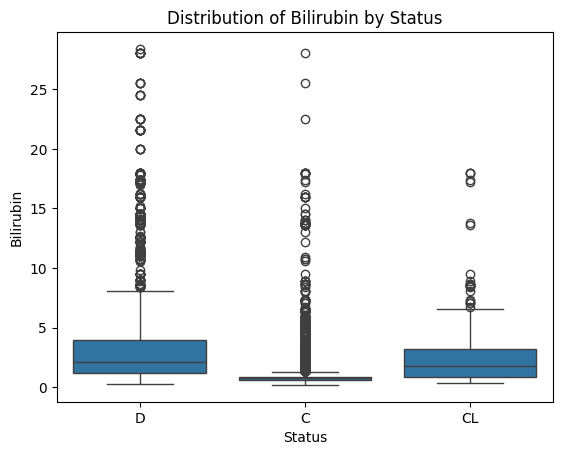

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Status', y='Bilirubin', data=df)
plt.title('Distribution of Bilirubin by Status')
plt.xlabel('Status')
plt.ylabel('Bilirubin')
plt.show()



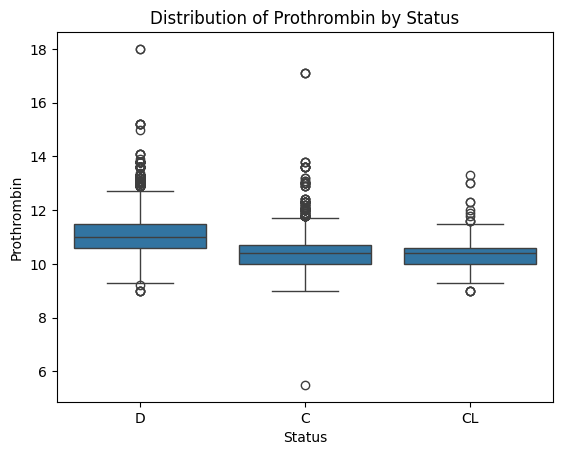

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Status', y='Prothrombin', data=df)
plt.title('Distribution of Prothrombin by Status')
plt.xlabel('Status')
plt.ylabel('Prothrombin')
plt.show()
